## Sampling the Distribution

The parameters can be estimated from the population by using random sampling. The ssize of the sample n is defiend and the parameters such as mean and variance are estimated.

Lets consider the following example. Consider a population of 1000 t-shirts with distinct values from 0 to 999. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
from scipy.stats import kurtosis, skew
import seaborn as sns

X = np.random.choice(np.arange(0, 1000), 1000, replace=False)
print(f'μ={X.mean()}')
print(f'σ={X.std()}')

μ=499.5
σ=288.6749902572095


Let's take 500 samples of size 20

In [ ]:
rs = []
for i in range(500):
    rs.append(np.random.choice(X, 20))
rs = np.array(rs)

# 20 examples of our random samples

rs[:20]

array([[937, 946, 332, 279, 255, 980, 393, 816, 492, 312, 534, 797, 871,
        108,  58, 548, 499, 894, 818, 531],
       [752, 145, 159, 877, 883, 847, 685, 448, 123, 962, 479, 404, 500,
        966, 166, 212, 668, 378, 288, 709],
       [988,  35, 804, 526, 474, 759, 180, 558, 885, 727, 112, 881, 393,
        505, 889, 456, 741, 293, 845, 208],
       [485, 126, 406,  36, 620, 201, 754,  92, 288, 165, 737, 412, 434,
        579,  43, 110,  18, 785, 746, 650],
       [ 40,  70, 808, 327, 430, 630, 969, 215, 265, 578, 541, 959, 217,
         26, 865, 559, 235, 193, 529, 699],
       [428,  11, 973,  44, 525, 500, 559, 113, 751, 166, 776, 441, 638,
        444,  87, 556, 628, 666, 323, 507],
       [924, 792, 982, 786, 952, 876, 564, 575, 142, 262, 570, 187, 269,
        231, 552, 684, 546, 463, 593, 967],
       [406, 909, 233, 247,  68, 514,  78, 174, 883, 326, 185, 780,   6,
        627, 855, 203, 533, 221, 370, 916],
       [888, 212, 310, 978, 346, 160, 160, 459, 124, 385, 319, 2

For each set, we we need to estimate the mean. plot the histogram to understand the sampling distribution, ie., Sampling distribution of the sample mean for a sample size equal to 20

[422.75 503.6  515.05 382.6  537.65 566.9  491.95 519.65 483.9  606.35
 549.45 463.55 550.45 424.85 602.1  534.5  556.2  499.6  517.   404.2 ]


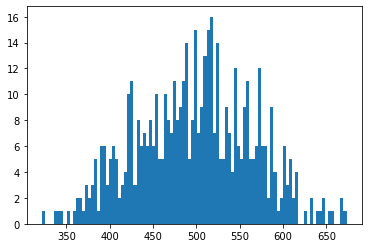

In [ ]:
x_bar = rs.mean(axis=1)
print(x_bar[:20])
plt.hist(x_bar, bins=100);

## Sampling distribution of Sample Proportion.

Consider, There are 20000 distinct colored balls and we want to calculate the proportion of finding one random ball. We difine a Bernolli RV.
To extend this to binomial, lets run this experiment for n = 500. 

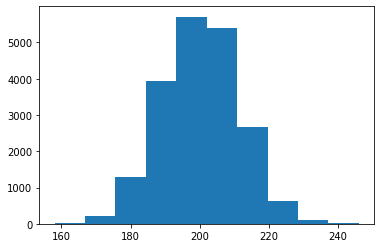

In [ ]:
p = 0.4
n = 500

X = bernoulli(p)
Y = [X.rvs(n) for i in range(20000)]

plt.hist(np.sum(Y, axis=1));

The above plot is tghe sampleing distribution of the sampling proportion. Lest estimate the mean and standard deviation.

In [ ]:
print('Empirically calculated expected value: {}'.format(np.mean(np.mean(Y, axis=1))))
print('Theoretical expected value: {}'.format(p))

Empirically calculated expected value: 0.4000673
Theoretical expected value: 0.4


In [ ]:
print('Empirically calculated standard deviation: {}'.format(np.std(np.mean(Y, axis=1))))
print('Theoretical standard deviation: {}'.format(np.sqrt(p*(1-p)/n)))

Empirically calculated standard deviation: 0.021886572840671057
Theoretical standard deviation: 0.021908902300206645


Normality of the sampling distribution of sample proportion

Consider:

In a music store, there are 100 new CDs received every week. The supplier states that they are delivering approximately 10% of Rock CDs. Calculate the weekly proportion of rock CDs in the weekly sample. 

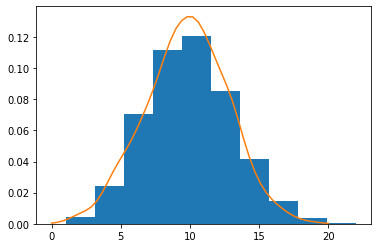

In [ ]:
n = 100
p = 0.1

X = bernoulli(p)
Y = [X.rvs(100) for i in range(10000)]

normal = np.random.normal(p*n, np.sqrt(n*p*(1-p)), (1000, ))
density = stats.gaussian_kde(normal)
n_, x, _ = plt.hist(normal, bins=np.linspace(0, 20, 50), 
                   histtype=u'step', density=True) 
plt.close()

plt.hist(np.sum(Y, axis=1), density=True)
plt.plot(x, density(x));

The above plot looks approximately normal.

Lets change the value of p = 3%

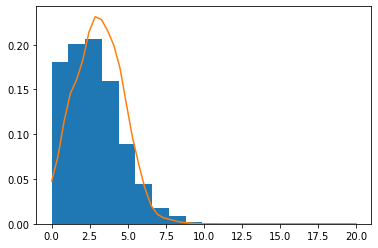

In [ ]:
n = 100
p_ = 0.03

X = bernoulli(p_)
Y_ = [X.rvs(100) for i in range(10000)]

normal = np.random.normal(p_*n, np.sqrt(n*p_*(1-p_)), (1000, ))
density = stats.gaussian_kde(normal)
n_, x, _ = plt.hist(normal, bins=np.linspace(0, 20, 50), 
                   histtype=u'step', density=True) 
plt.close()

plt.hist(np.sum(Y_, axis=1), density=True)
plt.plot(x, density(x));

The distribution is skewed to the left.

Why are these conditions important? These are relevant when we need to answer questions about the probability of sampling proportions. For example, returning to our example and considering the initial information of 10% probability of receiving Rock CDs. Consider that you find on your first trial that 12% of the CDs were Rock CDs. Assuming that the true proportion is informed by your supplier, what would be the probability that more than 12% of the sample you searched consists of Rock CDs?

So we need to compute P(p>0.12)

In [ ]:
print('Empirically calculated expected value: {}'.format(np.mean(np.mean(Y, axis=1))))
print('Theoretical expected value: {}'.format(p))

Empirically calculated expected value: 0.10037700000000002
Theoretical expected value: 0.1


In [ ]:
n = 100
p = 0.10
p_ = 0.12
print(f'P(p>0.12)={1-norm.cdf(p_, p, np.sqrt(p*(1-p)/n))}')

P(p>0.12)=0.252492537546923


## EXERCISES

1. Rick takes an SRS of 75 citizens on a distant planet to see what proportion of citizens sampled are satisfied with their standard of living. Suppose that 60% of the 1,000,000,000 citizens who live on the planet are satisfied with their living standards. What are the mean and standard deviation of the sampling distribution of the proportion of citizens who are satisfied with their standard of living?

2. Rick is performing quality control tests on different portal guns since there is some variability in the manufacturing process. For example, a certain gun has a target thickness of 5mm. The distribution of thicknesses is skewed to the right with a mean of 5mm and a standard deviation of 1mm. A quality control check on this part involves taking a random sample of 35 points and calculating the mean thickness of those points. What is the shape of the sampling distribution of the sample mean thickness? What is the probability that the mean thickness in the sample is within 0.2mm of the target value?